In [1]:
import pandas as pd
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import svm

In [2]:
df=pd.read_csv('diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
df.duplicated().sum()

0

In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


F:\annaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\annaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
F:\annaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warni

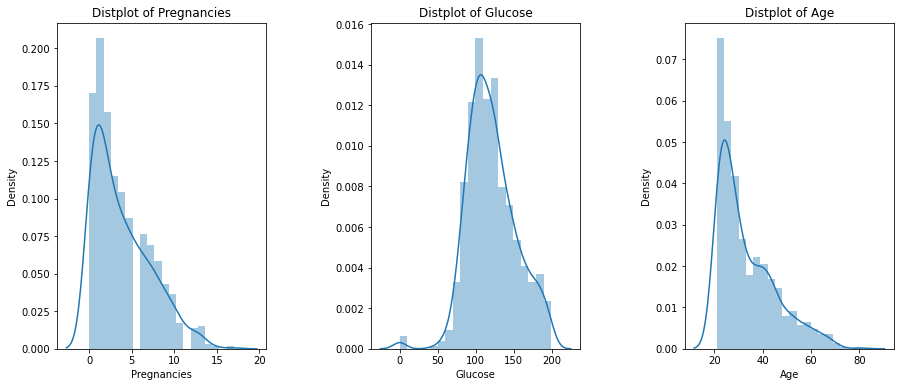

In [7]:
plt.figure(figsize=(15,6))
n=0
for x in ['Pregnancies','Glucose','Age']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()


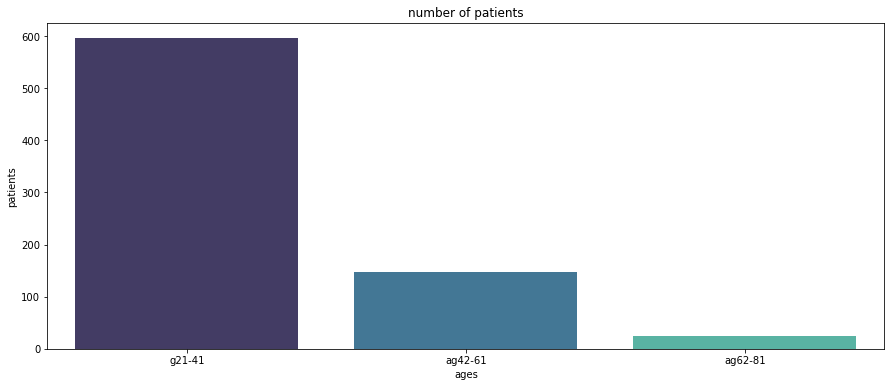

In [8]:
ag21_41=df['Age'][(df['Age']>=21)& (df['Age']<=41)]
ag42_61=df['Age'][(df['Age']>=42)& (df['Age']<=61)]
ag62_81=df['Age'][(df['Age']>=62)& (df['Age']<=81)]
aggx=['g21-41','ag42-61','ag62-81']
aggy=[len(ag21_41.values),len(ag42_61.values),len(ag62_81.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=aggx,y=aggy,palette='mako')
plt.xlabel('ages')
plt.ylabel('patients')
plt.title('number of patients')
plt.show()

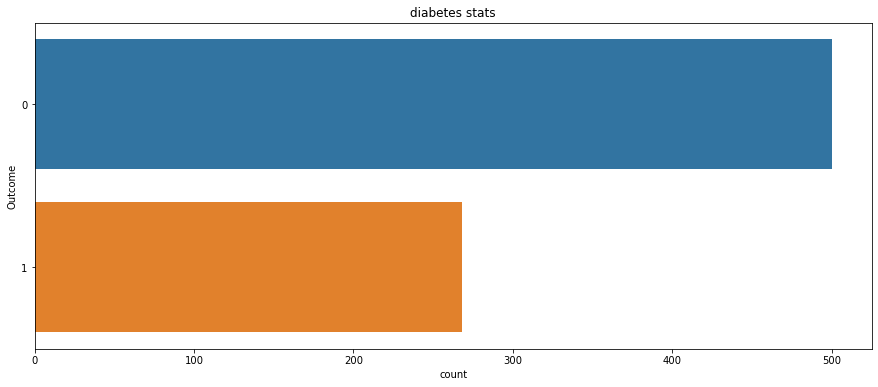

In [9]:
plt.figure(figsize=(15,6))
sns.countplot(y='Outcome',data=df)
plt.title('diabetes stats')
plt.xlabel('count')
plt.show()

In [19]:
#age likely to have majority pregnancy
ag21_41=df['Age'][(df['Age']>=21)& (df['Age']<=41)]
ag42_61=df['Age'][(df['Age']>=42)& (df['Age']<=61)]
ag62_81=df['Age'][(df['Age']>=62)& (df['Age']<=81)]
aggx=['g21-41','ag42-61','ag62-81']
pg0_5=df['Pregnancies'][(df['Pregnancies']>=0)& (df['Pregnancies']<=5)]
pg6_10=df['Pregnancies'][(df['Pregnancies']>=6)& (df['Pregnancies']<=10)]
pg11_15=df['Pregnancies'][(df['Pregnancies']>=11)& (df['Pregnancies']<=15)]
pg16_above=df['Pregnancies'][(df['Pregnancies']>=16)]
pgy=[len(pg0_5.values),len(pg6_10.values),len(pg11_15.values),len(pg16_above.values)]
plt.figure(figsize=(15,6))
sns.barplot(x=aggx,y=pgy,palette='mako')
plt.xlabel('ages')
plt.ylabel('no of prefnancies')
plt.title('age of patience with pregnacy')
plt.show()

<Figure size 1080x432 with 0 Axes>

<Figure size 1080x432 with 0 Axes>

In [20]:
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [21]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [22]:
X=df.iloc[:,0:8]
y=df['Outcome']
y.shape

(768,)

In [23]:
scaler=StandardScaler()
scaler.fit(X)
standardized_df=scaler.transform(X)
print(standardized_df)



[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [24]:
X=standardized_df
y.shape

(768,)

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
classifier=svm.SVC(kernel='linear')
model=classifier.fit(X_train,y_train)
predictictions=model.predict(X_test)

In [26]:
print('accuracy',accuracy_score(y_test,predictictions))

accuracy 0.7922077922077922


In [27]:
input_data=(4,110,92,0,0,37.6,0.191,30)
input_to_array=np.asarray(input_data)
# reshape the data
reshaped_data=input_to_array.reshape(1,-1)
# standardize
std_data=scaler.transform(reshaped_data)
#print(std_data)
prediction=classifier.predict(std_data)
print(prediction)
if prediction==[0]:
    print('not diabetic')
else:
    print('diabetic')


[0]
not diabetic
